In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

In [3]:
log_filename = '/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/logs/log-2024-10-04_19-03-48.csv'

df = pd.read_csv(log_filename, header=0)
df

,timestamp,t,action,reward,reward_adjusted,new_Q_value,alpha,epsilon
0,2024-10-04 19:03:57,1,3,-1,-1,-0.5,0.500000,1.000000
1,2024-10-04 19:03:59,2,1,0,0,0.0,0.500000,1.000000
2,2024-10-04 19:04:01,3,4,-3,-3,-1.5,0.500000,1.000000
3,2024-10-04 19:04:03,4,2,-2,-2,-1.0,0.500000,1.000000
4,2024-10-04 19:04:05,5,0,-2,-2,-1.0,0.500000,1.000000
...,...,...,...,...,...,...,...,...
115,2024-10-04 19:07:35,116,1,0,0,0.0,0.007291,0.014583
116,2024-10-04 19:07:37,117,1,0,0,0.0,0.007291,0.014583
117,2024-10-04 19:07:39,118,1,-1,0,0.0,0.007291,0.014583
118,2024-10-04 19:07:41,119,1,0,0,0.0,0.007291,0.014583


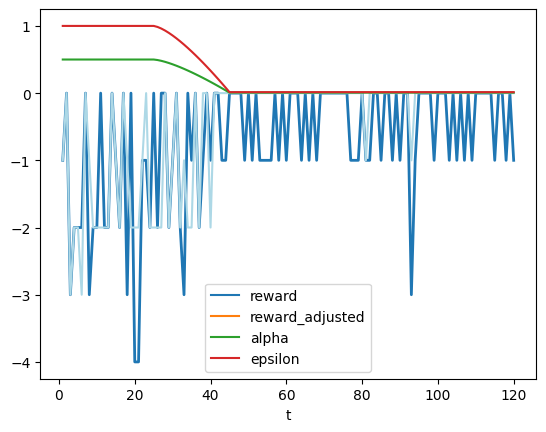

In [4]:
df_plot = df



# Rewards and adjuste drewads plot

ax = df_plot.plot('t', ['reward', 'reward_adjusted', 'alpha', 'epsilon'])
lines = ax.get_lines()
lines[0].set_linewidth(2)  # Make the reward line thicker
lines[1].set_color('lightblue')  # Make the reward_adjusted line light blue



# df_plot

# The first step nicely illustrates the current alpha value: whatever reward
# we will get, the q value of that action will be set to 0.5 of that

# Also illustrates how even if we learn some new information about an action
# in the later stage of the episode, it's q value will remain relatively unchanged
# because of the low alpha value


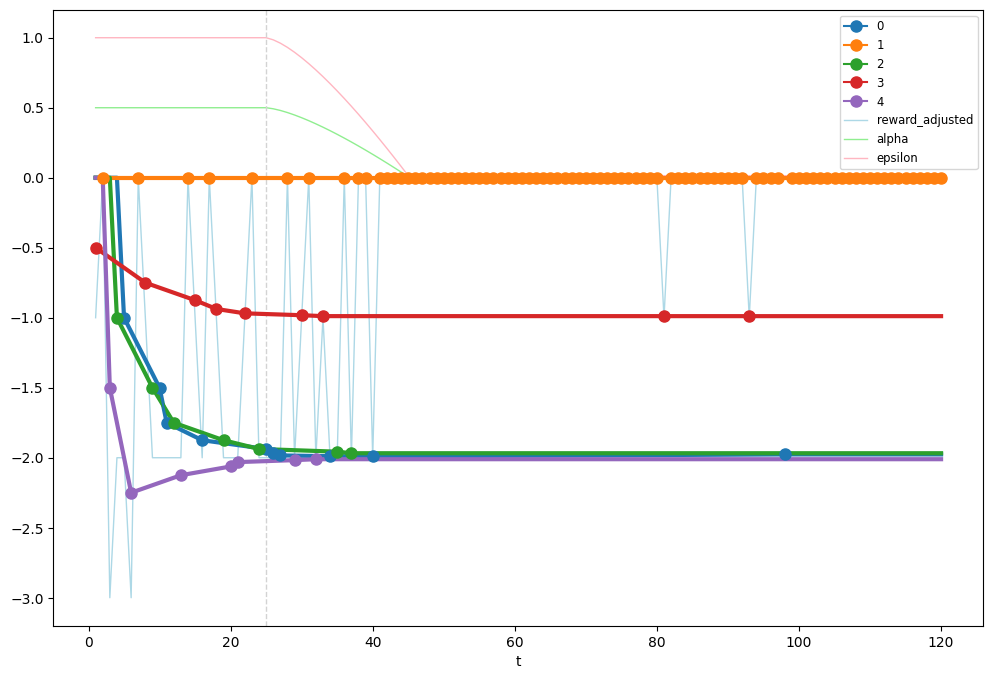

In [5]:
from log_plotting import plot_q_learning


fig, ax = plt.subplots()
plot_q_learning(df, fig, ax)


In [6]:
import time

In [7]:
max_steps = 120


def update_plot(fig, ax, df_plot):
    # Clear previous axis, otherwise it starts adding new colors
    ax.clear()
    ax.set_xlim(0, max_steps)
    ax.set_ylim(-6, 1.2)
    

    # df_plot.plot('t', 'reward_adjusted', ax=ax)
    plot_q_learning(df_plot, fig, ax)
    
    display.clear_output(wait=True)
    display.display(fig)
    plt.close(fig)


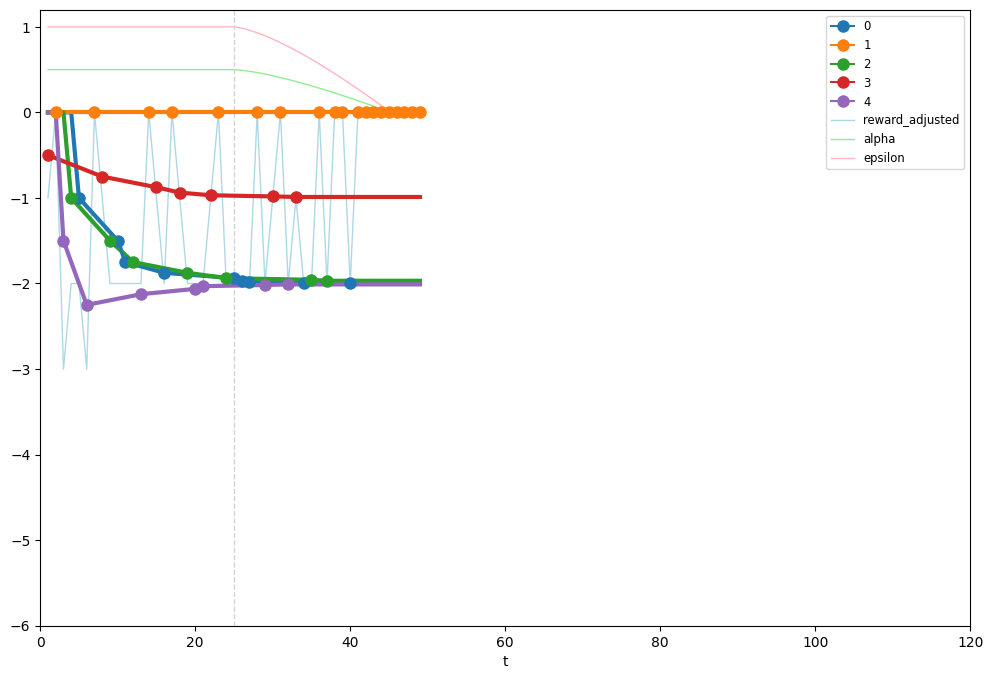

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

In [8]:
# Simulating reading from log

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(max_steps):
    df = pd.read_csv(log_filename, header=0)
    
    df_plot = df.iloc[:i+1]

    update_plot(fig, ax, df_plot)

    time.sleep(0.25)
